## Sales Analysis


#### Import Necessary Libraries

In [2]:
# Libraries required to fetch data and for EDA
import os
import pandas as pd
import numpy as np


# Libraries required for visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Libraries required to make plotly charts visible on github
import cufflinks as cf  
import plotly.io as pio


#### Merging 12 months of sales data into a single file

In [3]:

# Getting list of all the file in the directory  
files = [file for file in os.listdir('./Sales_Data') if file.endswith('.csv')]

for file in files:
    print(file)

# Initializing an empty dataframe
all_months_data = pd.DataFrame()

# Loop through each file and merge it into the dataframe
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

# getting data of all months in a single csv
all_months_data.to_csv("all_data.csv", index = False)
all_months_data.shape

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


(186850, 6)

### Exploring the data

#### Read in updated dataframe

In [4]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


All the columns in data are of object data type. To perform calculations on them or to analyze data we need to change them to data type respective to their values.                                                               
There is not null value in any specific column but we have seen NaN rows in the data above.                                         


### Data Cleaning
### Clean up the data!

#### Removing NaN Values

In [6]:
all_data.isna().sum(axis = 0)

all_data.dropna(how='all', inplace = True)  #all_data.dropna(axis=0) can also be used  # 0 menays by row

#### Deleting duplicate data

In [7]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [8]:
all_data = all_data[(all_data['Order ID'] != 'Order ID') | 
         (all_data['Product'] != 'Product') | 
         (all_data['Quantity Ordered'] != 'Quantity Ordered') | 
         (all_data['Price Each'] != 'Price Each') | 
         (all_data['Order Date'] != 'Order Date') | 
         (all_data['Purchase Address'] != 'Purchase Address')]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


#### Changing data types

In [10]:
all_data['Price Each']= pd.to_numeric(all_data['Price Each'])     
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [11]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


### Augment data with some additional columns

####  Adding `Month` Column

In [12]:
all_data['Month'] = all_data['Order Date'].dt.month
all_data['Month Name'] = all_data['Order Date'].dt.strftime('%B')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April


#### Adding `Sales` column  

In [13]:
# sales column is the product of Quantity Ordered and Price Each
all_data['Sales'] = all_data['Quantity Ordered']  * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99


#### Adding `State` column

In [14]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston (MA)


#### Adding `daytime` column

In [15]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles (CA),14,38


In [16]:
all_data['Order Date'].dt.hour

0          8
2         22
3         14
4         14
5          9
          ..
186845    20
186846    16
186847     7
186848    17
186849     0
Name: Order Date, Length: 185950, dtype: int64

### Question 1
##### What was best month for sales, How much was earned that month?

In [17]:
# grouping the data
monthly_sales = all_data.groupby(['Month','Month Name'])[['Sales','Quantity Ordered']].sum().sort_values('Month', ascending = True).reset_index()
monthly_sales['Sales(millions)'] = round(monthly_sales['Sales']/1e6,2)

In [18]:
monthly_sales 

,Month,Month Name,Sales,Quantity Ordered,Sales(millions)
0,1,January,1822256.73,10903,1.82
1,2,February,2202022.42,13449,2.20
2,3,March,2807100.38,17005,2.81
3,4,April,3390670.24,20558,3.39
4,5,May,3152606.75,18667,3.15
5,6,June,2577802.26,15253,2.58
6,7,July,2647775.76,16072,2.65
7,8,August,2244467.88,13448,2.24
8,9,September,2097560.13,13109,2.10
9,10,October,3736726.88,22703,3.74


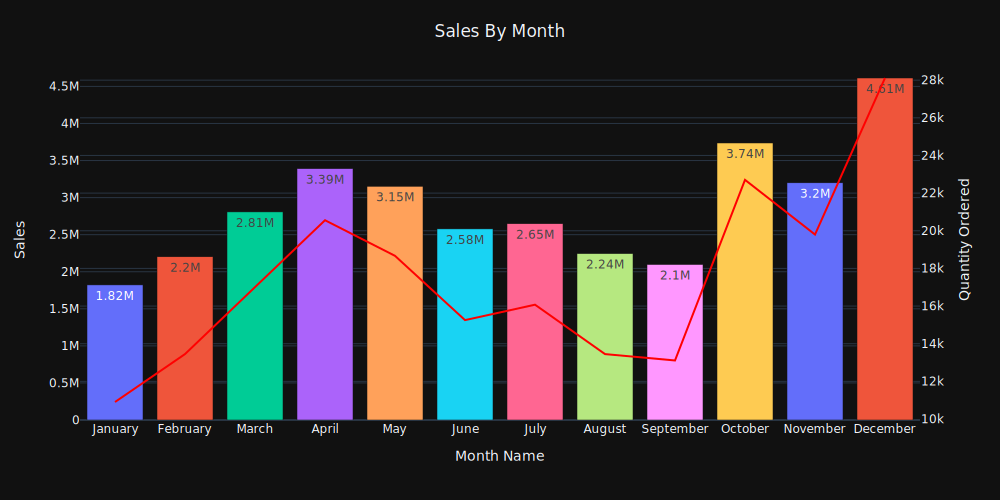

In [19]:
# Creating the Plotly bar chart 
fig = px.bar(monthly_sales, x="Month Name", y="Sales", color="Month Name", 
             text= monthly_sales['Sales(millions)'].apply(lambda x: f'{x}M'),labels={'Sales': 'Sales'})

# Add line chart for Quantity Ordered
fig.add_scatter(x=monthly_sales['Month Name'], y=monthly_sales['Quantity Ordered'], mode='lines',
                name='Quantity Ordered', line=dict(color='red'), yaxis='y2',
                text=monthly_sales['Quantity Ordered'],  
                hoverinfo='text+y')

fig.update_layout(
    template = 'plotly_dark',
    width=1000,
    title=dict(text="Sales By Month", x=0.5, y=0.95),
    showlegend=False,  
    coloraxis=dict(showscale=False),  
    coloraxis_showscale=False,
    yaxis2=dict(title='Quantity Ordered', overlaying='y', side='right'),  
)

fig.show("svg")


December, followed by October and April, stands out as peak sales months in that particular year.                                 
Since this is just 1 year data so it can't be concluded that it is yearly trend. But a hypothesis can be made that this upsurge in sales in specific months is due to holiday shopping, extra advertising or special deals.

### Question 2
##### Which city had the highest number of sales?

In [20]:
city_sales = all_data.groupby(['City'])[['Sales']].sum().sort_values('Sales', ascending = False).reset_index()
city_sales['Sales(Million)'] = round(city_sales['Sales']/1e6,2)
city_sales

,City,Sales,Sales(Million)
0,San Francisco (CA),8262203.91,8.26
1,Los Angeles (CA),5452570.80,5.45
2,New York City (NY),4664317.43,4.66
3,Boston (MA),3661642.01,3.66
4,Atlanta (GA),2795498.58,2.80
5,Dallas (TX),2767975.40,2.77
6,Seattle (WA),2747755.48,2.75
7,Portland (OR),1870732.34,1.87
8,Austin (TX),1819581.75,1.82
9,Portland (ME),449758.27,0.45


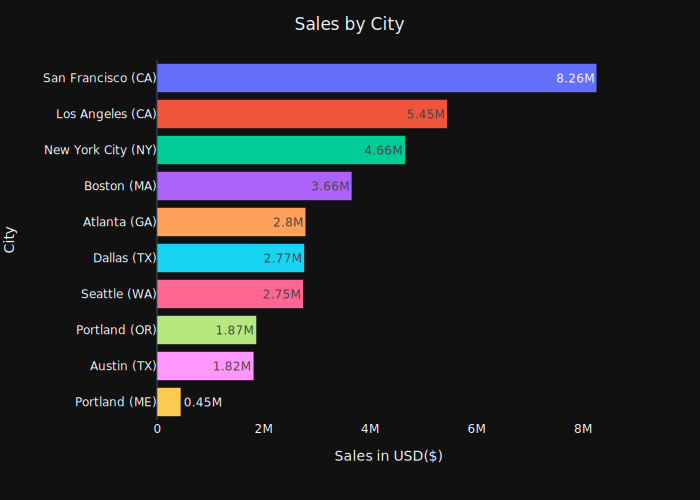

In [21]:
fig = px.bar(city_sales, x="Sales", y="City", color="City", text=city_sales['Sales(Million)'].apply(lambda x: f'{x}M'), labels={"Sales": 'Sales'}, template='plotly_dark')
fig.update_layout(title=dict(text='Sales by City', x=0.5), xaxis_title='Sales in USD($)', yaxis_title='City', xaxis_showgrid = False, showlegend=False)
fig.show("svg")

San Francisco has the highest sales, followed by Los Angeles and New York City. Several reasons could account for this, such as:

1. Population differences among cities may contribute to variations in sales figures, with larger cities potentially driving higher sales volumes.
2. Technology for advertising is more advanced in big cities like San Francisco.
3. Since `Silicon Valley (the global center of high technology)` is located in San Francisco, there is likely a natural high demand for electronics."


### Question 3
##### What time should we display advertisements to maximize likelihood of customer's buying product?

In [22]:
hourly = all_data.groupby(['Hour'])[['Order ID']].count().reset_index()
hourly

,Hour,Order ID
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


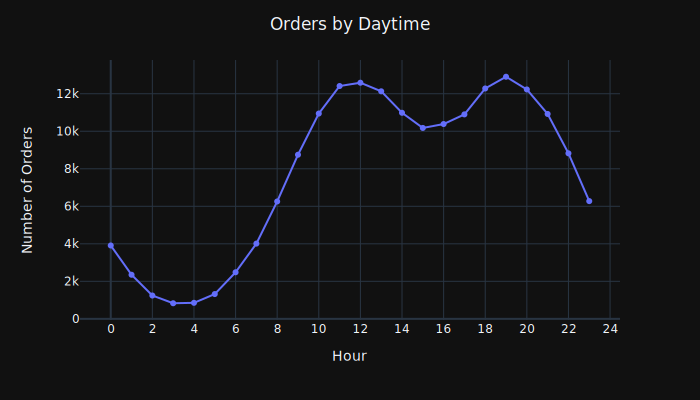

In [23]:
fig = px.line(hourly, x='Hour', y = 'Order ID', markers= True, template = 'plotly_dark')
fig.update_layout(title = dict(text = 'Orders by Daytime', x =0.5), yaxis_title = 'Number of Orders', width=700,height=400)
fig.update_xaxes(showgrid=True, dtick=2)
fig.show("svg")


Based on the analysis, the optimal times for advertisement are around 11:00 AM to 12:00 PM and 6:00 PM to 7:00 PM. This conclusion is drawn from the observation that a significant portion of orders occurred during these hours of the day.


### Question 4 
##### What products are most often sold together?

Products sold together are those products whose Order ID, Order time and address are same.


In [24]:
# finding which products were sold together
df = all_data[all_data['Order ID'].duplicated(keep= False)].copy() 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [25]:
# importing requires modules
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
# Create DataFrame from Counter object
combo_df = pd.DataFrame(count.items(), columns=['Combination', 'Count'])

# Sort DataFrame by count in descending order
combo_df = combo_df.sort_values(by='Count', ascending=False)

# Display top 10 combinations
combo_df.head(10)



,Combination,Count
8,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
13,"(iPhone, Wired Headphones)",447
0,"(Google Phone, Wired Headphones)",414
22,"(Vareebadd Phone, USB-C Charging Cable)",361
16,"(iPhone, Apple Airpods Headphones)",360
9,"(Google Phone, Bose SoundSport Headphones)",220
37,"(USB-C Charging Cable, Wired Headphones)",160
46,"(Vareebadd Phone, Wired Headphones)",143
81,"(Lightning Charging Cable, Wired Headphones)",92


 The most common products sold together are iPhone and Lightning Charging Cable, followed by Google Phone and USB-C Charging Cable.                                           
                                                                                                            
This info can be used for smart promotions or deals/offer.                                      
`Example` Probably people already want to buy an lightning charge cable with iphone but by starting a smart deal, bigger audience can be lured to buy that lightning charge cable.                  
This can be repeated with other common pairs and can be used as an advantage to the business. So, it helps in making decisions.

The most common products sold together are iPhone and Lightning Charging Cable, followed by Google Phone and USB-C Charging Cable.                                    
This information can be leveraged for strategic promotions or offers. For example, many customers may already intend to purchase a Lightning Charging Cable with an iPhone, but by introducing a smart deal, a larger audience can be enticed to add the Lightning Charging Cable to their purchase. This strategy can be replicated with other frequently paired products, providing a competitive advantage for the business and facilitating decision-making processes

### Question 5 
#####  What product sold the most? Why itis sold the most?

In [26]:
product_quantity = all_data.groupby('Product').agg({'Quantity Ordered':'sum','Price Each':'mean'}).sort_values('Quantity Ordered', ascending = False).reset_index()
product_quantity['Quantity(Thousands)'] = round(product_quantity['Quantity Ordered']/1e3,2)
product_quantity

,Product,Quantity Ordered,Price Each,Quantity(Thousands)
0,AAA Batteries (4-pack),31017,2.99,31.02
1,AA Batteries (4-pack),27635,3.84,27.64
2,USB-C Charging Cable,23975,11.95,23.98
3,Lightning Charging Cable,23217,14.95,23.22
4,Wired Headphones,20557,11.99,20.56
5,Apple Airpods Headphones,15661,150.00,15.66
6,Bose SoundSport Headphones,13457,99.99,13.46
7,27in FHD Monitor,7550,149.99,7.55
8,iPhone,6849,700.00,6.85
9,27in 4K Gaming Monitor,6244,389.99,6.24


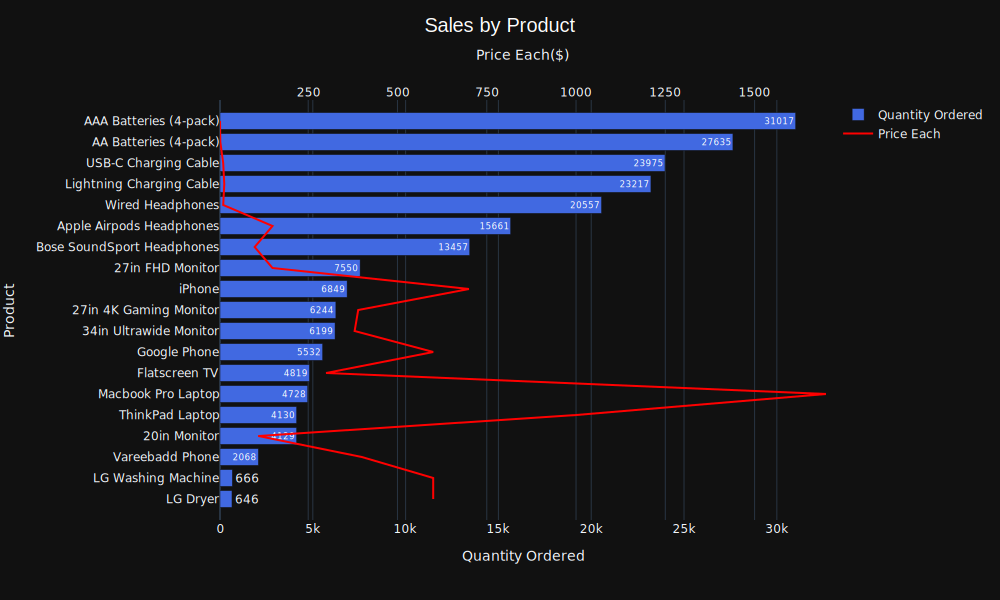

In [27]:

product_quantity = all_data.groupby('Product').agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'}).sort_values('Quantity Ordered', ascending=True).reset_index()

# Defining the tick positions for "Price Each"
price_each_ticks = list(range(0, 2001, 250))

fig = go.Figure()

# Bar chart for Quantity Ordered
fig.add_trace(go.Bar(x=product_quantity['Quantity Ordered'], y=product_quantity['Product'], text=product_quantity['Quantity Ordered'],
                     orientation='h', name='Quantity Ordered', marker=dict(color='royalblue')))

# Line chart for Price Each on the secondary x-axis
fig.add_trace(go.Scatter(x=product_quantity['Price Each'], y=product_quantity['Product'], mode='lines',
                         name='Price Each', line=dict(color='red'), xaxis='x2'))

# Update layout to show both x-axes with custom tick positions for "Price Each"
fig.update_layout(
    title=dict(text='Sales by Product', x=0.5, y= 0.97,font=dict(size=20, family="Arial", color="white")),  # Adjust the y value as needed
    xaxis=dict(title='Quantity Ordered', side='bottom'),
    xaxis2=dict(title='Price Each($)', overlaying='x', side='top', tickvals=price_each_ticks),
    yaxis=dict(title='Product'),
    template='plotly_dark', width =1000, height = 600
)

# Show the combined chart
fig.show("svg")


Useful insights can be found from the above plot:

1. AAA Batteries (4-pack) and AA Batteries (4-pack) emerge as the top-selling products, suggesting they are essential items.
2. High-priced items like Apple AirPods Headphones and Bose SoundSport Headphones significantly contribute to revenue despite their lower sales volumes.
3. Monitors, laptops, and smartphones, including the Google Phone and iPhone, demonstrate strong sales performance, reflecting consumer demand for technology products.

### Conclusion:

December proved to be the most lucrative month for sales, with San Francisco leading in revenue. Optimal advertisement timing around midday and early evening, ccombined with strategic product bundling and package deals, could further boost sales and enhance overall profitability.